### Introduction
Life is the most valuable and irreplaceable thing in the world. I believe no one wants to have car accidents while travelling on road. This project is to predict the severity and the possibility of getting into a car accident by using various data of the road like weather, date, road conditions, etc. that would be able to let people drive more carefully or even change the rounte or date of the journey. So that not only saving the time to get involve into a car accident but saving the life.  

Lets first load required libraries:

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

#### About dataset

This dataset is about traffic collisions in the City of Seattle. The __Data_Collisions.csv__ data set includes 38 columns and 194673 rows which are provided by SPD and recorded by Traffic Records for the last 10 years. The file  includes all types of collisions. The fields of the data as below:

| Field          | Description                       |
|----------------|-----------------------------------|
| SEVERITYCODE   | The severity of the collision. | 
| X              | The x-coordinate of the colision address.      | 
| Y              | The y-corrdinate of the collision address. |
| OBJECTID       | ESRI Object ID Field. |
| INCKEY         | A unique key for the incident.|
| COLDETKEY      | A key that corresponds to the collision’s detail. |
| REPORTNO       | The report number for the collision. |
| STATUS         | The status tells the information of the record matched or unmatched.| 
| ADDRTYPE       | The address type for the collision - Alley, Block or Intersection. |
| INTKEY         | A key corresponding to the intersection to which the collision is associated.|
| LOCATION       | A general location description for the collision.
| EXCEPTRSNCODE  | Unknown.   | 
| EXCEPTRSNDESC  | Unknown.   | 
| SEVERITYCODE   | Codifies the severity of the collision based on the fatality  and disabling injury counts as well as pre-existing state severity codes.
| SEVERITYDESC   | A general description of the severity of the collision.
| COLLISIONTYPE  | A description of the type of collision that is represented.
| PERSONCOUNT    | The number of people involved in the collision.
| PEDCOUNT       | The number of pedestrians involved in the collision.
| PEDCYLCOUNT    | The number of cyclists involved in the collision. 
| VEHCOUNT       | The number of vehicles involved in the collision. 
| INCDATE        | The date of the collision.
| INCDTTM        | The date and the time of the collision if an exact time is known.
| JUNCTIONTYPE   | The type of junction at which the collision occurred.
| SDOT_COLCODE   | A code for the collision determined by the Seattle Department of Transportation. 
| SDOT_COLDESC   | The human-readable description of the code given in the SDOT_COLCODE field. 
| INATTENTIONIND | Whether or not the collision was due to inattention of one or  more of the involved parties. 
| UNDERINFL      | Whether or not collision involved someone that was under the influence of drugs or alcohol. ‘1’ if so, ‘0’ if not, and “Null” if unknown.
| WEATHER        | The weather conditions at the time of the collision.
| ROADCOND       | The conditions of the road during the time of the collision. 
| LIGHTCOND      | The light conditions during the accident.
| PEDROWNOTGRNT  | Whether or not the pedestrian involved in the collision was granted the right-of-way.
| SDOTCOLNUM     | Unknown.
| SPEEDING       | Whether or not speeding was a factor in the collision.
| ST_COLCODE     | A state code for the type of collision. 
| ST_COLDESC     | A description of the state code for the type of collision.  
| SEGLANEKEY     | Unknown.
| CROSSWALKKEY   | Unknown.
| HITPARKEDCAR   | Whether or not the collision included hitting a parked car. |



Lets download the dataset

In [3]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-10-20 09:06:16--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

Data-Collisions.csv 100%[===================>]  70.49M  19.6MB/s    in 4.2s    

2020-10-20 09:06:20 (16.8 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [4]:
df = pd.read_csv('Data-Collisions.csv')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data visualization and pre-processing

We need to remove duplicated and unuseful columns and rows before forming a model. Since we are going to make use of the conditions of the road and the external factors of the enviornment to predict the severity of a car accident, all the unrelated data likes number of pedestrian involved, whether hitting a parked car or not will be removed from the source of the dataset. Also, those undefinted well enough records will be removed as well to avoid data being miss-trained. 

In [5]:
# Let's see the size of the dataset
df.shape

(194673, 38)

In [6]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

Firstly, let's drop unuseful fields - 'SEVERITYCODE'  (duplicated), 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'WEATHER', 'ROADCOND', 'LIGHTCOND' and further look into the context of each field.

In [7]:
df.drop(['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDATE','SDOT_COLCODE','SDOT_COLDESC','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR'], axis=1, inplace=True)
df_tmp=df

In [8]:
s = df['SEVERITYCODE']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
1,136485,0.701099,70.1%
2,58188,0.298901,29.9%


There are total 194673 records in which Severity = 1 contains 70.1%; Severity = 2 contains 29.9%.

In [9]:
# Convert the field INCDTM to datatime
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

In [10]:
# extract date, day, month and hour into different fields

df['day'] = df['INCDTTM'].dt.day
df['month'] = df['INCDTTM'].dt.month
df['hour'] = df['INCDTTM'].dt.hour

In [11]:
# Anaylsis the Day field
df_day = df

df_day = pd.DataFrame(df_day['day'].value_counts())
df_day.index.name = 'day'
df_day.columns = ['count']
df_day.sort_index(inplace=True)
df_day

,count
day,
1,6587
2,6473
3,6403
4,6342
5,6605
6,6486
7,6447
8,6536
9,6509


In [12]:
s = df['day']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
15,6687,0.034350,3.4%
5,6605,0.033929,3.4%
1,6587,0.033836,3.4%
8,6536,0.033574,3.4%
13,6529,0.033538,3.4%
20,6510,0.033441,3.3%
9,6509,0.033436,3.3%
10,6492,0.033348,3.3%
6,6486,0.033317,3.3%
2,6473,0.033251,3.3%


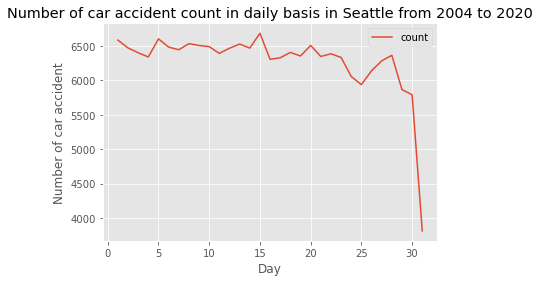

In [13]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

df_day.plot(kind='line')
plt.title('Number of car accident count in daily basis in Seattle from 2004 to 2020')
plt.ylabel('Number of car accident')
plt.xlabel('Day')

plt.show()

In [14]:
s = df['month']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(float)
df_mth = pd.DataFrame({'Percentage %': percent100})
df_mth.index.name = 'Month'
df_mth = df_mth.sort_index(axis = 0)
df_mth = df_mth.transpose() 
df_mth

Month,1,2,3,4,5,6,7,8,9,10,11,12
Percentage %,8.4,7.4,8.3,8.2,8.6,8.5,8.4,8.4,8.1,9.1,8.5,8.0


In [15]:
s = df['hour']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

pd.set_option('display.max_columns', None)
df_h = pd.DataFrame({'Percentage %': percent100})
df_h.index.name = 'Hour'
df_h = df_h.sort_index(axis = 0)
df_h = df_h.transpose() 
df_h

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Percentage %,17.7%,1.8%,1.9%,0.9%,0.6%,0.9%,1.6%,3.4%,4.4%,4.1%,3.8%,4.2%,5.3%,5.2%,5.5%,5.9%,6.2%,6.7%,5.0%,3.7%,3.2%,2.9%,2.8%,2.4%


In [16]:
#df_hour = df_tmp.loc['hour', df_tmp['hour'].value_counts]
df_hour = df

df_hour = pd.DataFrame(df_hour['hour'].value_counts())
df_hour.index.name = 'hour'
df_hour.columns = ['count']
df_hour.sort_index(inplace=True)
df_hour

,count
hour,
0,34381
1,3408
2,3606
3,1665
4,1222
5,1667
6,3199
7,6543
8,8570


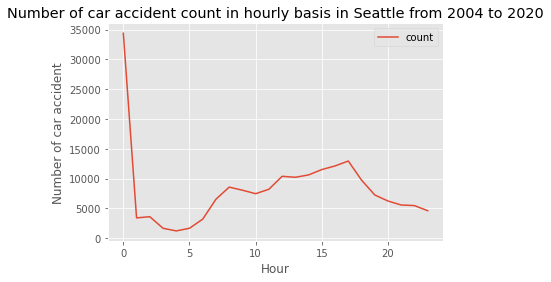

In [17]:
df_hour.plot(kind='line')
plt.title('Number of car accident count in hourly basis in Seattle from 2004 to 2020')
plt.ylabel('Number of car accident')
plt.xlabel('Hour')

plt.show()


From the analysis of date and time value of the field 'INCDTTM', we found that 'day' and 'month' have quite evenly distributed pattern on each value, only 'hour' with uneven distrubution which means the time may affect the severity of a car accident.

In [18]:
s = df['JUNCTIONTYPE']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percentage %': percent100})

,Counts,Percentage %
Mid-Block (not related to intersection),89800,47.7%
At Intersection (intersection related),62810,33.3%
Mid-Block (but intersection related),22790,12.1%
Driveway Junction,10671,5.7%
At Intersection (but not related to intersection),2098,1.1%
Ramp Junction,166,0.1%
Unknown,9,0.0%


In [19]:
s = df['ADDRTYPE']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percentage %': percent100})

,Counts,Percentage %
Block,126926,65.9%
Intersection,65070,33.8%
Alley,751,0.4%


In [20]:
df.groupby(['JUNCTIONTYPE'])['ADDRTYPE'].value_counts(normalize=True)

JUNCTIONTYPE                                       ADDRTYPE    
At Intersection (but not related to intersection)  Intersection    0.999046
                                                   Alley           0.000477
                                                   Block           0.000477
At Intersection (intersection related)             Intersection    0.999936
                                                   Block           0.000064
Driveway Junction                                  Block           0.994470
                                                   Alley           0.005530
Mid-Block (but intersection related)               Block           0.999956
                                                   Intersection    0.000044
Mid-Block (not related to intersection)            Block           0.997911
                                                   Alley           0.001966
                                                   Intersection    0.000123
Ramp Junction           

In [21]:
df.groupby(['ADDRTYPE'])['JUNCTIONTYPE'].value_counts(normalize=True)

ADDRTYPE      JUNCTIONTYPE                                     
Alley         Mid-Block (not related to intersection)              0.745763
              Driveway Junction                                    0.250000
              At Intersection (but not related to intersection)    0.004237
Block         Mid-Block (not related to intersection)              0.727105
              Mid-Block (but intersection related)                 0.185370
              Driveway Junction                                    0.086369
              Ramp Junction                                        0.001083
              At Intersection (intersection related)               0.000033
              Unknown                                              0.000033
              At Intersection (but not related to intersection)    0.000008
Intersection  At Intersection (intersection related)               0.967052
              At Intersection (but not related to intersection)    0.032255
              Ramp Junct

From the above analysis of the fields 'JUNCTIONTYPE' and'ADDRTYPE', the field JUNCTIONTYPE can be simply defined to Block, Intersection and Alley (make use of ADDRTYPE then). And since 'Alley' only dominate 0.4%, therefore, we replace all Alley to Block as well (as 75% of Alley related to block as well, 25% of Alley related to Driveway Junction which also can map to Block'). Thus we can now drop the field JUNCTIONTYPE and replace all Alley to Block in the entire dataset.

In [22]:
# Drop JUNCTIONTYPE
df.drop(['JUNCTIONTYPE'], axis=1, inplace=True)

In [23]:
# Replace Alley to Block
df['ADDRTYPE'].replace(to_replace=['Alley'], value=['Block'],inplace=True)

In [24]:
df['ADDRTYPE'].value_counts(normalize=True)

Block           0.662407
Intersection    0.337593
Name: ADDRTYPE, dtype: float64

Convert Categorical features to numerical values

In [25]:
df['ADDRTYPE'].replace(to_replace=['Block','Intersection'], value=['0','1'],inplace=True)
df.head()

,SEVERITYCODE,ADDRTYPE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,day,month,hour
0,2,1,2013-03-27 14:54:00,Overcast,Wet,Daylight,27,3,14
1,1,0,2006-12-20 18:55:00,Raining,Wet,Dark - Street Lights On,20,12,18
2,1,0,2004-11-18 10:20:00,Overcast,Dry,Daylight,18,11,10
3,1,0,2013-03-29 09:26:00,Clear,Dry,Daylight,29,3,9
4,2,1,2004-01-28 08:04:00,Raining,Wet,Daylight,28,1,8


In [26]:
s = df['LIGHTCOND']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts,'Percentage %': percent100})

,Counts,Percentage %
Daylight,116137,61.3%
Dark - Street Lights On,48507,25.6%
Unknown,13473,7.1%
Dusk,5902,3.1%
Dawn,2502,1.3%
Dark - No Street Lights,1537,0.8%
Dark - Street Lights Off,1199,0.6%
Other,235,0.1%
Dark - Unknown Lighting,11,0.0%


In [27]:
df['LIGHTCOND'].replace(to_replace=['Daylight'], value=['0'],inplace=True)
df['LIGHTCOND'].replace(to_replace=['Dark - Street Lights On','Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting'], value=[1,1,1,1],inplace=True)
df['LIGHTCOND'].replace(to_replace=['Unknown','Dusk','Dawn','Other'], value=[2,2,2,2],inplace=True)
df.head(5)

,SEVERITYCODE,ADDRTYPE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,day,month,hour
0,2,1,2013-03-27 14:54:00,Overcast,Wet,0,27,3,14
1,1,0,2006-12-20 18:55:00,Raining,Wet,1,20,12,18
2,1,0,2004-11-18 10:20:00,Overcast,Dry,0,18,11,10
3,1,0,2013-03-29 09:26:00,Clear,Dry,0,29,3,9
4,2,1,2004-01-28 08:04:00,Raining,Wet,0,28,1,8


In [28]:
s = df['WEATHER']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percentage %': percent100})

,Counts,Percentage %
Clear,111135,58.6%
Raining,33145,17.5%
Overcast,27714,14.6%
Unknown,15091,8.0%
Snowing,907,0.5%
Other,832,0.4%
Fog/Smog/Smoke,569,0.3%
Sleet/Hail/Freezing Rain,113,0.1%
Blowing Sand/Dirt,56,0.0%
Severe Crosswind,25,0.0%


In [29]:
# Since Snowing, Other, Fog/Smog/Smoke,etc. contain too few of data, therefore, migrate them to 'Unknown' as well
df['WEATHER'].replace(to_replace=['Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'], value=['Unknown','Unknown','Unknown','Unknown','Unknown','Unknown','Unknown'],inplace=True)
df['WEATHER'].value_counts(normalize=True)

Clear       0.586180
Raining     0.174823
Overcast    0.146177
Unknown     0.092820
Name: WEATHER, dtype: float64

In [30]:
# Massage the data of the field ROADCOND
s = df['ROADCOND']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percentage %': percent100})

,Counts,Percentage %
Dry,124510,65.6%
Wet,47474,25.0%
Unknown,15078,7.9%
Ice,1209,0.6%
Snow/Slush,1004,0.5%
Other,132,0.1%
Standing Water,115,0.1%
Sand/Mud/Dirt,75,0.0%
Oil,64,0.0%


In [31]:
# Since Ice, Other, Snow/Slush,etc. contain too few of data, therefore, migrate them to 'Unknown' as well
df['ROADCOND'].replace(to_replace=['Ice','Other','Snow/Slush','Standing Water','Sand/Mud/Dirt','Oil'], value=['Unknown','Unknown','Unknown','Unknown','Unknown','Unknown'],inplace=True)

In [32]:
# Group WEATHER and ROADCOND together to see their relationship
pd.set_option('display.max_rows', None)
df.groupby(['WEATHER'])['ROADCOND'].value_counts(normalize=True)

WEATHER   ROADCOND
Clear     Dry         0.955272
          Wet         0.032390
          Unknown     0.012338
Overcast  Dry         0.584109
          Wet         0.388059
          Unknown     0.027832
Raining   Wet         0.971968
          Dry         0.019342
          Unknown     0.008690
Unknown   Unknown     0.866185
          Dry         0.083258
          Wet         0.050557
Name: ROADCOND, dtype: float64

In [33]:
df.groupby(['ROADCOND'])['WEATHER'].value_counts(normalize=True)

ROADCOND  WEATHER 
Dry       Clear       0.853044
          Overcast    0.130039
          Unknown     0.011765
          Raining     0.005151
Unknown   Unknown     0.862409
          Clear       0.077629
          Overcast    0.043656
          Raining     0.016307
Wet       Raining     0.678862
          Overcast    0.226554
          Clear       0.075848
          Unknown     0.018736
Name: WEATHER, dtype: float64

We can see that whenever ROADCOND = 'Unknown', WEATHER has 86.2% = 'Unknown' as well and vice versa. Since, both fields are important to the prediction of severity of a accident, therefore, to prevent mis-leading the prediction, we will drop those record with ROADCOND or WEATHER = 'Unknown'. 

In [ ]:
df.shape

(194673, 9)

In [ ]:
df = df.drop(df[df.ROADCOND == 'Unknown'].index)
df = df.drop(df[df.WEATHER == 'Unknown'].index)

In [ ]:
df.shape

In [ ]:
df.groupby(['ROADCOND'])['WEATHER'].value_counts(normalize=True)

Convert Categorical features to numerical values

In [ ]:
df['ROADCOND'].replace(to_replace=['Dry','Wet'], value=['0','1'],inplace=True)
#df['WEATHER'].replace(to_replace=['Clear','Overcast','Raining'], value=['0','1','2'],inplace=True)
df.head(5)

Further drop unuseful columns - INCDTTM, day and month

In [ ]:
df.drop(['INCDTTM','day','month'], axis=1, inplace=True)

In [ ]:
df.shape

In [ ]:
df = df.dropna()

In [ ]:
df.shape

## One Hot Encoding

Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [49]:
Feature = df[['ADDRTYPE','ROADCOND','LIGHTCOND','hour']]
Feature = pd.concat([Feature,pd.get_dummies(df['WEATHER'])], axis=1)
Feature.head()

,ADDRTYPE,ROADCOND,LIGHTCOND,hour,Clear,Overcast,Raining
0,1,1,0,14,0,1,0
1,0,1,1,18,0,0,1
2,0,0,0,10,0,1,0
3,0,0,0,9,1,0,0
4,1,1,0,8,0,0,1


In [50]:
Feature['Raining'].value_counts()

0    135966
1     32693
Name: Raining, dtype: int64

### Feature selection

In [51]:
# Lets defind feature sets, X:
X = Feature
X[0:5]

,ADDRTYPE,ROADCOND,LIGHTCOND,hour,Clear,Overcast,Raining
0,1,1,0,14,0,1,0
1,0,1,1,18,0,0,1
2,0,0,0,10,0,1,0
3,0,0,0,9,1,0,0
4,1,1,0,8,0,0,1


In [52]:
#2—injury
# 1—prop damage

df['SEVERITYCODE'].replace(to_replace=[1,2], value=['prop damage','injury'],inplace=True)

In [53]:
y = df['SEVERITYCODE'].values
y[0:5]

array(['injury', 'prop damage', 'prop damage', 'prop damage', 'injury'],
      dtype=object)

### Normalize Data

In [54]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, object were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 1.3303062 ,  1.62463582, -0.67098842,  0.36364292, -1.35465181,
         2.30085871, -0.49035683],
       [-0.75170664,  1.62463582,  0.99332377,  0.94377584, -1.35465181,
        -0.43462034,  2.03933125],
       [-0.75170664, -0.61552256, -0.67098842, -0.21648999, -1.35465181,
         2.30085871, -0.49035683],
       [-0.75170664, -0.61552256, -0.67098842, -0.36152322,  0.73819707,
        -0.43462034, -0.49035683],
       [ 1.3303062 ,  1.62463582, -0.67098842, -0.50655645, -1.35465181,
        -0.43462034,  2.03933125]])

### Classification 

Then use the training set to build an accurate model by using the following algorithm:

- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

### K Nearest Neighbor(KNN)
To find the best k to build the model.

In [55]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (134927, 7) (134927,)
Test set: (33732, 7) (33732,)


In [66]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
# To find the best k
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.57550694, 0.5168979 , 0.60322542, 0.55549626, 0.59388711,
       0.58368908, 0.61259338, 0.59255307, 0.63257441])

In [67]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6325744100557334 with k= 9


In [68]:
# Building the model again, using k=9
from sklearn.neighbors import KNeighborsClassifier
k = 9
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
yhat_knn = kNN_model.predict(X_test)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')


### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
yhat_dt = DT_model.predict(X_test)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Support Vector Machine

In [57]:
from sklearn import svm
SVM_model = svm.SVC()

SVM_model.fit(X_train, y_train) 
yhat_svm = SVM_model.predict(X_test)
SVM_model

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
yhat_lr = LR_model.predict(X_test)
yhat_prob_lr = LR_model.predict_proba(X_test)
LR_model

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Model Evaluation using Test set

In [61]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [69]:
# KNN
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat_knn))
print("KNN F1-score: %.2f" % f1_score(y_test, yhat_knn, average='weighted') )

KNN Jaccard index: 0.63
KNN F1-score: 0.61


In [63]:
# Decision Tree
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat_dt))
print("DT F1-score: %.2f" % f1_score(y_test, yhat_dt, average='weighted') )

DT Jaccard index: 0.67
DT F1-score: 0.54


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
# SVM
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat_svm))
print("SVM F1-score: %.2f" % f1_score(y_test, yhat_svm, average='weighted') )

SVM Jaccard index: 0.67
SVM F1-score: 0.54


In [72]:
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat_lr))
print("LR F1-score: %.2f" % f1_score(y_test, yhat_lr, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, yhat_prob_lr))

LR Jaccard index: 0.67


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LR F1-score: 0.54
LR LogLoss: 0.62


# Report
The accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.63    | 0.61     | NA      |
| Decision Tree      | 0.67    | 0.54     | NA      |
| SVM                | 0.67    | 0.54     | NA      |
| LogisticRegression | 0.67    | 0.54     | 0.62    |